# Linear Algebra

In [1]:
import torch

## Scalars

Scalars are denoted by lower case letters, e.g. x, y and z. Scalars are implemented in ML as tensors with a single element.

In [3]:
x = torch.tensor(3.0)
y = torch.tensor(2.0)

x + y, x - y, x * y, x / y, x ** y

(tensor(5.), tensor(1.), tensor(6.), tensor(1.5000), tensor(9.))

## Vectors

Vectors are one-dimensional arrays of scalars, usually of fixed length. They are denoted by bold, lowercase letters **x**, **y**, **z**. When training a model, these vectors may have real-world significance, for example if predicting the likelihood of an individual defaulting on a loan, we may have vector *elements* which correspond to their income, length of employment, number of previous defaults, etc. 

One thing to note is that while in python, vector/tensor indexing begins at zero, in linear algebra, indexing begins at one.

In [5]:
x = torch.arange(3)
x

tensor([0, 1, 2])

We refer to the individual elements of a tensor using subscript, for example the 2nd element of the tensor **x** would be $x_2$, note that we do not bold the indexed element of the tensor as this is a scalar value. By default, the values of a vector are written in column format.

$x = \begin{bmatrix} 0 , 1 , 2 , \vdots , n \end{bmatrix}$

Here, the values $x_1, x_2, x_3$ are the elements of the vector. Later we will distinguish between column and row vectors (whose elements are stacked horizontally)

To indicate that a vector $\mathbf{x}$ contains $n$ elements, we write $\mathbf{x} \in \mathbb{R}^{n}$. Formally, we call $n$ the _dimensionality_ of the vector. 

In [6]:
# The dimensionality of a vector can be accessed via the python len() function

len(x)

3

Oftentimes, the word dimension gets overloaded to refer to both the number of elements in a vector and the number of "axes". In this book, order refers to the number of "axes" and dimensionality is used exclusively to refer to the numnber of elements of a vector.

## Matrices

Just as scalars are 0-dimensional tensors and vectors are 1-dimensional tensors, matrices are 2-dimensional tensors. Matrices are denoted in this text as bold, capital letters, e.g. $\mathbf{X, Y, Z}$. The expression $\mathbf{A} \in \mathbb{R}^{m \times n}$ indicates that a matrix $\mathbf{A}$ is composed of $n \times m$ real numbers, with $m$ rows and $n$ columns. If $m=n$ the matrix is square. The text $a_{ij}$ indexes an individual element in the matrix in the $i$th row and the $j$th column.

In [10]:
# We can convert any appropriately sized tensor into an m x n matrix by using reshape

A = torch.arange(6).reshape(3, 2)
A

tensor([[0, 1],
        [2, 3],
        [4, 5]])

Sometimes we want to flip the axes, when we exchange the rows and columns of a matrix this is known as the transpose, and is written $\mathbf{A}^{\intercal}$. If $B = A^{\intercal}$ then $a_{ij} = b_{ji}$ for all $i$ and $j$. The transpose of an $m \times n$ matrix is an $n \times m$ matrix.

In [11]:
# In code, we represent a matrix's transpose as
A.T

tensor([[0, 2, 4],
        [1, 3, 5]])

Symmetric matrices are a subset of matrices that are equal to their own transpose

In [16]:
A = torch.tensor([[1, 2, 3], [2, 0, 4], [3, 4, 5]])
A == A.T

tensor([[True, True, True],
        [True, True, True],
        [True, True, True]])

Matrices are useful for representing datasets, by convention, rows indicate different entities/records while columns refer to distinct attributes.

## Tensors

Tensors extend the principles of the above methods to arbitrary numbers of axes. They are written in a special uppercase font in the book using \mathsf e.g. $\mathsf{X}$. Their indexing mechanisms, e.g. $x_{i, j,k}$ and $[\mathsf{X}]_{1,2i-1,3}]$ follows from that of matrices.

Tensors are particularly important when working with images, each image is typically a 3rd order tensor with axes corresponding to height, width and channel, where channel would refer to the values for each colour of a pixel, e.g. RGB. Furthermore, a _collection_ of images is represented by a 4th order tensor, where distinct images are indexed along the first axis. 




In [17]:
# Making a tensor

torch.arange(24).reshape((2, 3, 4))

tensor([[[ 0,  1,  2,  3],
         [ 4,  5,  6,  7],
         [ 8,  9, 10, 11]],

        [[12, 13, 14, 15],
         [16, 17, 18, 19],
         [20, 21, 22, 23]]])

In [21]:
# As might be expected, element-wise operations on tensors give results that have the same number of elements as the original

A = torch.arange(24).reshape((2, 3, 4))
B = A.clone()

A.shape, (A+B).shape

(torch.Size([2, 3, 4]), torch.Size([2, 3, 4]))

The element-wise product of two tensors is known as the Hadamard product, and is denoted with a symbol of a dot in a circle: $\odot$. The Hadamard product for two matrices $\mathbf{A}, \mathbf{B} \in \mathbb{R} ^ {m \times n}$: 

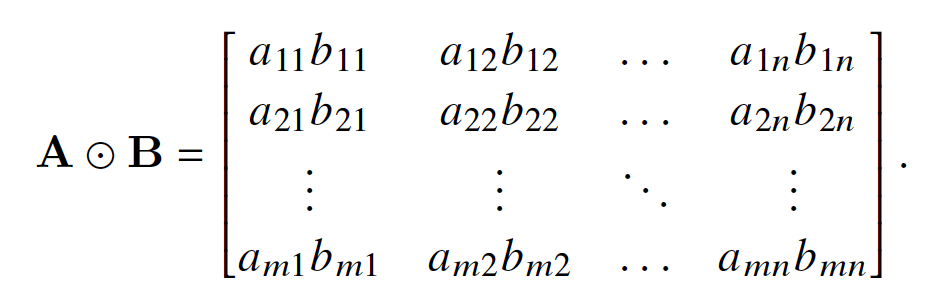

In [24]:
# In code, this would be...

print(A * B)

# Adding or multiplying a scalar into a tensor also produces a result with the same shape as the original tensor.

print((5 * A).shape)

print((A + 5).shape)

tensor([[[  0,   1,   4,   9],
         [ 16,  25,  36,  49],
         [ 64,  81, 100, 121]],

        [[144, 169, 196, 225],
         [256, 289, 324, 361],
         [400, 441, 484, 529]]])
torch.Size([2, 3, 4])
torch.Size([2, 3, 4])


## Reduction

We often wish to sum over all the elements of a tensor, we would sum over the elements of a vector $\mathrm{x}$ by writing $\sum^{n}_{i=1}x_i$. For the elements of an $m \times n$ matrix, we would write $\sum^m_{i=1}\sum^n_{j=1}x_{i, j}$. 

In [35]:
A = torch.arange(6, dtype=torch.float32).reshape(2, 3)

print(A)
print()

# In python, we can simply write these sums with the .sum() method.

print(A.sum())
print()

# By default, this reduces all axes of the tensor, producing a scalar value. If, instead, we wish to sum _along_ some direction, we can specify an axis. 
# For example, to sum along the rows, we pass in axis = 0, as the rows (m) are axis 0. 

print("Summing along axis=0 sums along the rows (i.e. down a column), producing a vector")
print(A.sum(axis=0))
print()

# Specifying axis=1 sums along all the column dimensions

print("Summing along axis=1 sums along the columns (i.e. down a row), producing a vector")
print(A.sum(axis=1))
print()

print("Reducing a matrix along both columns and rows is equivalent to just taking the sum.")
print(A.sum(axis=[0, 1]) == A.sum())

tensor([[0., 1., 2.],
        [3., 4., 5.]])

tensor(15.)

Summing along axis=0 sums along the rows (i.e. down a column), producing a vector
tensor([3., 5., 7.])

Summing along axis=1 sums along the columns (i.e. down a row), producing a vector
tensor([ 3., 12.])

Reducing a matrix along both columns and rows is equivalent to just taking the sum.
tensor(True)


A related common operation is the mean, which is so common it gets its own operation

In [36]:
A.mean(), A.sum()/A.numel()

(tensor(2.5000), tensor(2.5000))

In [42]:
# Likewise, the function for calculating the mean can also reduce a matrix along a given axis (axis=0 takes the mean on the rows, axis=1 takes the mean along the columns).

print(A.mean(axis=0)) # 1.5, 2.5, 3.5
print(A.mean(axis=1)) # 1., 4

tensor([1.5000, 2.5000, 3.5000])
tensor([1., 4.])


## Non-reduction Sum

In the sum example above, both results have the same dimensions despite being the result of summations along different axes. If we wish to keep the dimensions the same (for example for broadcasting) we can use the a`keepdims` parameter

In [51]:
print(f"A: \n{A}\n") 
sum_A = A.sum(axis=1, keepdims=True)
print(f"Keep Dim Sum: \n{sum_A}\n")
print(f"Normal Sum: \n{A.sum(axis=1)} \n")

A: 
tensor([[0., 1., 2.],
        [3., 4., 5.]])

Keep Dim Sum: 
tensor([[ 3.],
        [12.]])

Normal Sum: 
tensor([ 3., 12.]) 



In [54]:
# keeping the dimensionality is useful, for example, we can divide the original matrix A by sum_A, which is summed along axis 1 
# (i.e. summed along rows to produce a column vector) to produce a matrix where the sum along a row is equal to 1.

print(A / sum_A)

tensor([[0.0000, 0.3333, 0.6667],
        [0.2500, 0.3333, 0.4167]])


In [57]:
# If we want to compute the cumulative sum along a particular axis, we can use the cumsum method. 

print(A.cumsum(axis=1))

tensor([[ 0.,  1.,  3.],
        [ 3.,  7., 12.]])


## Dot Products

The dot product of two vectors $\mathbf{x}, \mathbf{y} \in \mathbb{R}^{d}$, written as $\mathbf{x}^{\intercal}\mathbf{y}$ or $\langle \mathbf{x}, \mathbf{y} \rangle$ is the sum of the product of the elements at the same position: $\sum_{i=1}^{d}x_iy_i$.

Dot products are useful for a number of reasons
- For example, given a vector of values $\mathbf{x} \in \mathbb{R}^{n}$ and a vector of weights $\mathbf{w} \in \mathbb{R}^{n}$, the weighted sum of the values in $\mathbf{x}$ would be given by $\mathbf{w}^{\intercal}\mathbf{x}$, or the dot product of $\mathbf{w}$ with $\mathbf{x}$ (or $\langle \mathbf{w}, \mathbf{x} \rangle$.
- If the weights are nonnegative and sum to 1, then the dot product above evaluates to a weighted average.
- If the lengths of the two vectors are normalised to 1, then the dot product gives the cosine of the angle between them.

In [63]:
x = torch.arange(3, dtype=torch.float32)
y = torch.ones(3, dtype=torch.float32)
x, y, torch.dot(x, y)

# from: 0*1 + 1*1 + 2*1)

(tensor([0., 1., 2.]), tensor([1., 1., 1.]), tensor(3.))

In [65]:
# This is equivalent to an element-wise product followed by a sum

sum(x * y)

tensor(3.)

##  Matrix-Vector Products

Now that we understand the dot product, we can begin to understand the product between an $m \times n$ matrix $\mathbf{A}$ and an n-dimensional vector $\mathbf{x}$. 

We can think of the matrix $\mathbf{A}$ as a column vector composed of row vectors:

$\mathbf{A} = \begin{bmatrix} \mathbf{a}^{\intercal}_{1} \, \mathbf{a}^{\intercal}_{2} \, \mathbf{a}^{\intercal}_{3} \, \vdots \, \mathbf{a}^{\intercal}_{m}  \end{bmatrix}$

where each $\mathbf{a}^{\intercal}_{i} \in \mathbb{R}^n$ is a row vector representing the $i$th row of $\mathbf{A}$.

The matrix-vector product $\mathbf{Ax}$ is simply a column vector with $m$ rows (the number of rows in the original matrix), where each element is the dot product between that row and the vector $\mathbf{x}$. I.e. $\mathbf{a}^{\intercal}_{i}\mathbf{x}$:

$\mathbf{Ax} = \begin{bmatrix} \mathbf{a}^{\intercal}_{1} \, \mathbf{a}^{\intercal}_{2} \, \mathbf{a}^{\intercal}_{3} \, \vdots \, \mathbf{a}^{\intercal}_{m}  \end{bmatrix} \mathbf{x} =  \begin{bmatrix} \mathbf{a}^{\intercal}_{1}\mathbf{x} \, \mathbf{a}^{\intercal}_{1}\mathbf{x} \, \mathbf{a}^{\intercal}_{3}\mathbf{x} \, \vdots \, \mathbf{a}^{\intercal}_{m}\mathbf{x} \end{bmatrix}$

... so a column vector of all scalar values.

We can think of multiplication by a matrix $\mathbf{A} \in \mathbb{R} ^ {m\times n}$ as projecting the vector $\mathbf{x}$ from $n$ to $m$ dimensions. Which can be remarkably useful, for example, rotations can be represented by certain square matrices (i guess we could imagine projecting a 2d vector up into a 3d space, maybe this is worth coding to see). 

Matrix-vector products also describe the key calculation step in predicting the output of each a layer of a neural network given the outputs from the prevous layer. 

In [69]:
# To express it in code, we use the mv function, python also includes an @ convenience funtion which will do either the matrix-vecotr product or matrix-matrix multiplication depending on the context. 

print(A.shape, x.shape, torch.mv(A, x), A@x)

print(f"{A} * {x} = {A@x}")

torch.Size([2, 3]) torch.Size([3]) tensor([ 5., 14.]) tensor([ 5., 14.])
tensor([[0., 1., 2.],
        [3., 4., 5.]]) * tensor([0., 1., 2.]) = tensor([ 5., 14.])


## Matrix-Matrix Multiplication

Matrix multiplication is now reasonably straightforward to understand, it is much like the matrix-vector product, but we instead create new columns in the resultant matrix for every column in the matrix on the right hand side of the multiplication.

Assume we have two matrices $\mathbf{A} \in \mathbb{R}^{n \times k}$ and $\mathbf{A} \in \mathbb{R}^{k \times m}$. We can think of $\mathbf{A}$ as being composed of its row vectors $\mathbf{a}^\intercal_{i}$ as before, and $\mathbf{B}$ as being composed of its column vectors $\mathbf{b}_j$. The first column of the resultant matrix $\mathbf{C}$ is much like the matrix-vector product, that is, the dot product of $\mathbf{A}_i$ and $\mathbf{b}_1$ for all $i$ rows of the matrix $\mathbf{A}$, but now we add new columns for multiplying in $\mathbf{b}_2$ through $m$. In the end:

$\mathbf{C} = 
\begin{bmatrix}  
    \mathbf{a}^{\intercal}_1 \mathbf{b}_1,  \mathbf{a}^{\intercal}_1 \mathbf{b}_2,  \mathbf{a}^{\intercal}_1 \mathbf{b}_1,  \dots,  \mathbf{a}^{\intercal}_1 \mathbf{b}_m \\\
    \mathbf{a}^{\intercal}_2 \mathbf{b}_1,  \mathbf{a}^{\intercal}_2 \mathbf{b}_1,  \mathbf{a}^{\intercal}_2 \mathbf{b}_2 , \dots , \mathbf{a}^{\intercal}_2 \mathbf{b}_m \\\
    \vdots , \vdots , \vdots , \vdots, \vdots\\\
    \mathbf{a}^{\intercal}_n \mathbf{b}_1 , \mathbf{a}^{\intercal}_n \mathbf{b}_1 , \mathbf{a}^{\intercal}_n \mathbf{b}_2 , \dots , \mathbf{a}^{\intercal}_n \mathbf{b}_m \\\
\end{bmatrix}$

In [71]:
# In code...

B = torch.ones(3, 4)

torch.mm(A, B), A@B

(tensor([[ 3.,  3.,  3.,  3.],
         [12., 12., 12., 12.]]),
 tensor([[ 3.,  3.,  3.,  3.],
         [12., 12., 12., 12.]]))

## Norms